#Correlación y causalidad

La **correlación** examina la relación entre dos variables. Sin embargo, observar que dos variables se mueven conjuntamente no significa necesariamente que una variable sea la causa de la otra. Por eso solemos decir que "la **correlación** no implica **causalidad**".

Aquí mostramos un ejemplo bastante llamativo con datos del INE que servirá para ejemplificar estos conceptos.

##Librerías

In [1]:
#cargamos las librerías que nos van a hacer falta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Datos

Empleamos un dataset con distintas variables y de dintinta temática para ver si hay correlación entre ellas.

In [64]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
ccaa = 'causalidad.xlsx'
data = pd.read_excel(ccaa, sheet_name='Datos', header = 0)

print (data.head(6))

Saving causalidad.xlsx to causalidad.xlsx
        ccaa  poblacion  libros  ...  nacimientos  divorcios  condenados
0  andalucia    8478084    6906  ...        69397      13992       42464
1     aragon    1330333    1558  ...         9644       1610        5521
2   asturias    1018899     965  ...         5152       1696        4765
3   baleares    1210725     865  ...         9681       2149        6471
4   canarias    2236992     784  ...        14137       3995       12307
5  cantabria     582388     536  ...         3547        990        2962

[6 rows x 12 columns]


In [58]:
#indexamos las CCAA
datos = data.set_index('ccaa')
datos.head()

,poblacion,libros,altas_hospitalarias,matrimonios,gasto_chocolate,gasto_cerveza,gasto_tabaco,gasto_restauracion,nacimientos,divorcios,condenados
ccaa,,,,,,,,,,,
andalucia,8478084,6906,709675,15175,511580.92,311900.60,1092818.41,7618505.91,69397,13992,42464
aragon,1330333,1558,150046,2285,93323.46,40661.33,224560.57,1459323.73,9644,1610,5521
asturias,1018899,965,116417,1849,87928.46,25501.00,143570.64,1058137.61,5152,1696,4765
baleares,1210725,865,134127,2960,89063.13,55388.36,155648.40,1314230.94,9681,2149,6471
canarias,2236992,784,186301,4869,166877.44,66664.05,222746.36,1470867.93,14137,3995,12307


Dividimos las distintas variables entre la población, para así convertirlas en términos relativos y eliminar el efecto de la población en cada CCAA (las comunidades con más personas, como es lógico pensar, tenderán a contar con más nacimientos o condenados, por ejemplo).

In [59]:
b = pd.Series(datos['poblacion'])
c = datos.drop(['poblacion'], axis=1)

datos_1 = c.div(b, axis = 0)
datos_1.head(5)


,libros,altas_hospitalarias,matrimonios,gasto_chocolate,gasto_cerveza,gasto_tabaco,gasto_restauracion,nacimientos,divorcios,condenados
ccaa,,,,,,,,,,
andalucia,0.000815,0.083707,0.001790,0.060342,0.036789,0.128899,0.898612,0.008185,0.001650,0.005009
aragon,0.001171,0.112788,0.001718,0.070150,0.030565,0.168800,1.096961,0.007249,0.001210,0.004150
asturias,0.000947,0.114258,0.001815,0.086298,0.025028,0.140908,1.038511,0.005056,0.001665,0.004677
baleares,0.000714,0.110782,0.002445,0.073562,0.045748,0.128558,1.085491,0.007996,0.001775,0.005345
canarias,0.000350,0.083282,0.002177,0.074599,0.029801,0.099574,0.657520,0.006320,0.001786,0.005502


##Visualización correlación entre variables

Una vez obtenidos los datos pasamos a ver la posible correlación entre las distintas variables que componen el dataset

In [60]:
#Creación de la matriz de correlación
corr_matr = datos_1.corr()
display(corr_matr)

,libros,altas_hospitalarias,matrimonios,gasto_chocolate,gasto_cerveza,gasto_tabaco,gasto_restauracion,nacimientos,divorcios,condenados
libros,1.000000,0.394456,0.155371,0.190515,0.093704,-0.144149,0.434964,0.299208,-0.083687,-0.208785
altas_hospitalarias,0.394456,1.000000,0.087650,0.397067,-0.224821,0.177703,0.485781,-0.111138,-0.225544,-0.216378
matrimonios,0.155371,0.087650,1.000000,0.423940,0.324572,-0.274841,0.098847,0.117309,0.610799,0.676597
gasto_chocolate,0.190515,0.397067,0.423940,1.000000,-0.279482,-0.256224,0.480401,-0.272238,0.208088,0.175244
gasto_cerveza,0.093704,-0.224821,0.324572,-0.279482,1.000000,-0.042959,0.072564,0.785252,0.247906,0.366278
gasto_tabaco,-0.144149,0.177703,-0.274841,-0.256224,-0.042959,1.000000,-0.039623,-0.270931,-0.515363,-0.218538
gasto_restauracion,0.434964,0.485781,0.098847,0.480401,0.072564,-0.039623,1.000000,0.256689,-0.020103,-0.108243
nacimientos,0.299208,-0.111138,0.117309,-0.272238,0.785252,-0.270931,0.256689,1.000000,0.171024,0.147266
divorcios,-0.083687,-0.225544,0.610799,0.208088,0.247906,-0.515363,-0.020103,0.171024,1.000000,0.732566
condenados,-0.208785,-0.216378,0.676597,0.175244,0.366278,-0.218538,-0.108243,0.147266,0.732566,1.000000


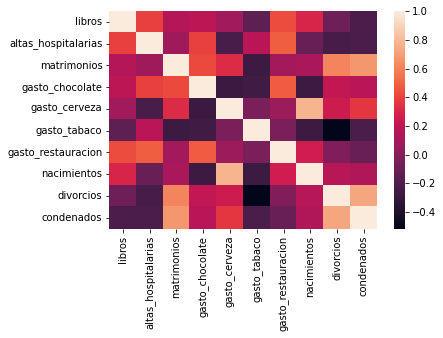

In [61]:
# Heatmap matriz de correlaciones

heat_map = sns.heatmap(corr_matr)
heat_map;

Tanto a través de la matriz de correlación como del heatmap se observa una alta correlación entre las variables Gasto_cerveza y nacimientos. Procedemos a realizar un modelo de MCO para obtener más detalles.

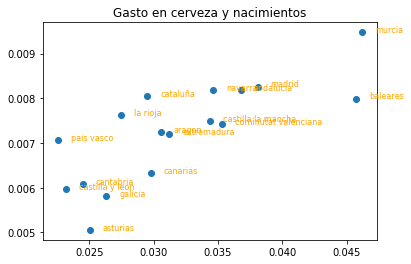

In [62]:
#Gráfico
x = datos_1['gasto_cerveza']
y = datos_1['nacimientos']
fig, ax = plt.subplots()
ax.plot(x,y,'o')
ax.set_title('Gasto en cerveza y nacimientos')

#Para que aparezcan los nombres de las CCAA
for i in range(datos_1.shape[0]): #data.shape[0] es el número de filas del dataset, si fuera data.shape[1] sería el de las columnas
    plt.text(x=datos_1.gasto_cerveza[i]+0.001, y=datos_1.nacimientos[i], s=data.ccaa[i],
             fontdict=dict(color='orange',size=8))

##Ajuste del modelo

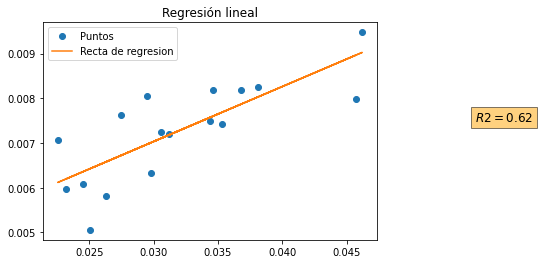

In [63]:
#Librería
from sklearn.linear_model import LinearRegression

reg =LinearRegression()
reg.fit(x.values.reshape(-1,1),y) # ajuste del modelo

# Calculo de las betas y de r2
r2=(round(reg.score(x.values.reshape(-1,1), y),2))

# Gráfico
fig, ax = plt.subplots()
ax.plot(x, y,'o',label='Puntos')
ax.plot(x, reg.predict(x.values.reshape(-1,1)), label='Recta de regresion')
ax.legend() #Para la leyenda dentro de la gráfica

#Para insertar la cajita con información adicional
textstr = r'$R2=%.2f$' % (r2, )
ax.text(0.055,0.0075, textstr, fontsize = 12, bbox=dict(facecolor='orange', alpha=0.5))

ax.set_title('Regresión lineal')
fig.show()

Según este análisis, los nacimientos son emplicados en un 66% (porcentaje bastante elevado) por el gasto en cerveza, de lo que se desperende que contra más cerveza se consume más niños nacen.

Este es un buen ejemplo para ilustrar que una alta correlación no tiene que implicar causalidad, si no que puede haber muchos factores detrás, como simplemente la casualidad. De ahí la importancia del razocinio económico y saber separar una cosa de la otra.